<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** To find out if the supply of rainfall can meet and sustain water demand in Singapore for the next 1 year

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code: 
def calculate_mean(array):
    return sum(array)/len(array)

In [3]:
calculate_mean([47,56,3,10])

29.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [315]:
# Code:

# def calculate_mean(array):
#     return sum(array)/len(array)

def calculate_sd(array):
    total = 0
    for i in array:
        diff = (i - calculate_mean(array))
        total += (diff**2)
    return (total / len(array))**(0.5)

In [316]:
calculate_sd([47,56,3,10])

22.85825890132492

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [63]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [421]:
# import all files related to weather
dhr_df = pd.read_csv('../data/rainfall-monthly-highest-daily-total.csv')
mtr_df = pd.read_csv('../data/rainfall-monthly-total.csv')
nor_df = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
temp_df = pd.read_csv('../data/surface-air-temperature-monthly-mean.csv')
humid_df = pd.read_csv('../data/relative-humidity-monthly-mean.csv')

#### For each of the dataset, find out the data types, number of columns and rows, and whether it has any null values
1. .info() for data types and number of rows
2. .tail() to find out the last available data. 
    * this can help in determining merging later
3. .isnull().mean() to find out proportion of null values, if any
    * if proportion is low, I will consider dropping the rows

#### Observations on dataset:
1. The datasets do not have any null values
2. There is a need to fix datetime across all the tables
    * we will merge them, and fix it together
3. Datatype for date column is listed as objects
    * we will convert them to datetime format, before transforming them into Year and Month
    * then, we will bin them into decades and seasons
4. The 'limiting factor' would be the dataset with the shortest number of rows (till Aug 2022)
    * this will determine how we merge the data later


In [412]:
dhr_df.info() # 490 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      490 non-null    object 
 1   maximum_rainfall_in_a_day  490 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [415]:
dhr_df.tail() # till Oct 2022

,month,maximum_rainfall_in_a_day
485,2022-06,59.4
486,2022-07,27.8
487,2022-08,32.4
488,2022-09,38.2
489,2022-10,38.8


In [414]:
dhr_df.isnull().mean()

month                        0.0
maximum_rainfall_in_a_day    0.0
dtype: float64

In [72]:
mtr_df.info() # 488 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [416]:
mtr_df.tail() # till Aug 2022

,month,total_rainfall
483,2022-04,239.6
484,2022-05,102.0
485,2022-06,211.8
486,2022-07,145.2
487,2022-08,141.4


In [126]:
mtr_df.isnull().mean()

month             0.0
total_rainfall    0.0
dtype: float64

In [417]:
nor_df.info() # 488 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [419]:
nor_df.tail() # till Aug 2022

,month,no_of_rainy_days
483,2022-04,18
484,2022-05,12
485,2022-06,17
486,2022-07,16
487,2022-08,15


In [420]:
nor_df.isnull().mean()

month               0.0
no_of_rainy_days    0.0
dtype: float64

In [422]:
temp_df.info() # 491 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      491 non-null    object 
 1   mean_temp  491 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [423]:
temp_df.tail() # till Nov 2022

,month,mean_temp
486,2022-07,28.6
487,2022-08,28.1
488,2022-09,27.9
489,2022-10,27.6
490,2022-11,27.4


In [424]:
temp_df.isnull().mean()

month        0.0
mean_temp    0.0
dtype: float64

In [425]:
humid_df.info() # 490 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    490 non-null    object 
 1   mean_rh  490 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [426]:
humid_df.tail() # till Oct 2022

,month,mean_rh
485,2022-06,79.1
486,2022-07,76.8
487,2022-08,77.4
488,2022-09,76.9
489,2022-10,78.7


In [427]:
humid_df.isnull().mean()

month      0.0
mean_rh    0.0
dtype: float64

#### Merge data to fix datetime
1. Merge the datasets
2. Fix datetime into year and month respectively
1. Group into different seasons, adapted from [weather.gov.sg](http://www.weather.gov.sg/climate-climate-of-singapore/)
    * Northeast Monsoon Season (December-Feb) - typically rain more, and becomes dryer towards the end
    * Inter-monsoon Period (March-May)
    * Southwest Monsoon Season (June-September) - typically dryer
    * Inter-monsoon Period (October - November)
2. Group into decades
    * 1982 - 1991 (80s)
    * 1992 - 2001 (90s)
    * 2002 - 2021 (10s)
    * 2022 - now (20s)

In [429]:
# use mtr_df as the limiting factor, so the last row of entry for merged_df is Aug 2022
merged_df = mtr_df.merge(nor_df,on=['month']).merge(dhr_df,on=['month']).merge(temp_df, on=['month']).merge(humid_df, on=['month'])

In [430]:
# convert to datetime format
merged_df['date']=pd.to_datetime(merged_df['month'])

# split into year and month
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month

In [432]:
# group months into into monsoon seasons

def monsoon_status(merged_df):
    if merged_df['month'] == 12 or merged_df['month'] == 1 or merged_df['month'] == 2:
        return 'Northeast Monsoon (Dec-Feb)'
    elif merged_df['month'] == 6 or merged_df['month'] == 7 or merged_df['month'] == 8 or merged_df['month']== 9:
        return 'Southwest Monsoon (Jun-Sept)'
    elif merged_df['month'] == 10 or merged_df['month'] == 11:
        return 'Inter-monsoon (Oct - Nov)'
    else:
        return 'Inter-monsoon (Mar-May)'

merged_df['season'] = merged_df.apply(monsoon_status, axis = 1)

In [433]:
# group years into decades

def decade(merged_df):
    if merged_df['year'] < 1990:
        return '80s'
    elif merged_df['year'] >= 1990 and merged_df['year'] < 2000:
        return '90s'
    elif merged_df['year'] >= 2000 and merged_df['year'] < 2010:
        return '00s'
    elif merged_df['year'] >= 2010 and merged_df['year'] < 2020:
        return '10s'
    else:
        return '20s'

merged_df['decade'] = merged_df.apply(decade, axis = 1)

In [434]:
merged_df.head()

,month,total_rainfall,no_of_rainy_days,maximum_rainfall_in_a_day,mean_temp,mean_rh,date,year,season,decade
0,1,107.1,10,36.5,25.9,81.2,1982-01-01,1982,Northeast Monsoon (Dec-Feb),80s
1,2,27.8,5,9.4,27.1,79.5,1982-02-01,1982,Northeast Monsoon (Dec-Feb),80s
2,3,160.8,11,61.7,27.2,82.3,1982-03-01,1982,Inter-monsoon (Mar-May),80s
3,4,157.0,14,45.1,27.0,85.9,1982-04-01,1982,Inter-monsoon (Mar-May),80s
4,5,102.2,10,33.0,28.0,83.2,1982-05-01,1982,Inter-monsoon (Mar-May),80s


#### Rename and rearrange 
1. Rename long table names
2. Rearrange columns for easy analysis

In [437]:
# rename the columns
new_columns_dict = {
    'maximum_rainfall_in_a_day': 'daily_max_rainfall',
    'no_of_rainy_days': 'rainy_days',
}

# assign new column names
merged_df.rename(columns = new_columns_dict, inplace=True) 

In [438]:
merged_df_columns = ['date', 'year', 'month', 'decade', 'season', 'total_rainfall', 'rainy_days', 'daily_max_rainfall', 
                     'mean_temp', 'mean_rh',]

merged_df = merged_df[merged_df_columns]

#### export the merged data into a .csv file

In [439]:
merged_df.to_csv('../data/merged_data.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

All datasets were obtained from [data.gov.sg](https://data.gov.sg). Values were measured and recorded at the Changi Climate Station
1. [total amount of rainfall of the month](https://data.gov.sg/dataset/rainfall-monthly-total)
2. [monthly maximum daily total rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
3. [number of rainy days](https://data.gov.sg/dataset/rainfall-monthly-number-of-rain-days)
4. [monthly mean temp](https://data.gov.sg/dataset/surface-air-temperature-monthly-mean)
5. [monthly relative humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)

|Feature|Type|Dataset|Description|
|---|---|---|---|
|date|datetime|all datasets|Jan 1982 - Aug 2022 (datasets #1 & #3), Jan 1982 - Oct 2022 (datasets #2 & #5), Jan 1982 - Nov 2022 (dataset #4)
|year|integer|all datasets|1982 - 2022
|month|integer|all datasets|Jan - Dec, represented by 01 - 12 respectively
|decade|obj|merged_df|80s to 2020s
|season|obj|merged_df|Northeast Monsoon (Dec-Feb), Southwest Monsoon (Jun-Sept), Inter-monsoon (Oct-Nov), Inter-monsoon (May-Mar)
|total rainfall|float|rainfall-monthly-total|the total monthly rainfall, recorded in millimetre| 
|maximum daily rainfall|float|rainfall-monthly-highest-daily-total|the highest daily total rainfall for the month in millimetre| 
|number of rainy days|int|rainfall-monthly-number-of-rain-days|the number of rain days (day with rainfall amount of 0.2mm or more) in a month| 
|mean daily surface air temperature|float|relative-humidity-monthly-mean|in Degree Celsius|
|monthly relative humidity|float|relative_humidity-monthly-mean|Percentages, expressed as a value over 100, i.e. "100" represents 100%|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [ ]:
# Q1: A quick summary statistics of the dataset

In [219]:
merged_df.describe()

,total_rainfall,rainy_days,max_rainfall
count,488.000000,488.000000,488.000000
mean,177.163730,14.061475,52.332172
std,113.916029,4.947394,35.746423
min,0.200000,1.000000,0.200000
25%,93.850000,11.000000,30.675000
50%,159.450000,14.000000,43.900000
75%,238.075000,18.000000,63.050000
max,765.900000,27.000000,216.200000


In [409]:
# dictionary comprehension for the standard deviation function created in part 1
# select column types of int and float only(merged_df[col].dtype=='int64')
# check how to get the keys within cols, so it is not a string!!!!

# Q2: Use a dictionary comprehension to apply the standard deviation function you create in part 1 to each numeric column in the dataframe
sd_df = {col: calculate_sd(col) for col in merged_df.columns if (type(col)=='float64')}
print (sd_df)

{}


In [243]:
for col in merged_df.columns:
    print(type(col))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
# Q3(a): Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?

In [252]:
# find highest total rainfall in 1990, 2000, 2010, 2020
merged_df.groupby('year')['total_rainfall'].max()
'''
Answers:
1990 : 204.5mm
2000 : 385.7mm
2010 : 298.5mm
2020 : 255.6mm
'''

year
1982    494.1
1983    370.6
1984    470.4
1985    340.1
1986    396.0
1987    568.6
1988    440.4
1989    508.4
1990    204.5
1991    492.3
1992    502.7
1993    308.5
1994    425.4
1995    372.8
1996    300.0
1997    351.9
1998    463.4
1999    340.5
2000    385.7
2001    609.0
2002    307.2
2003    444.2
2004    600.9
2005    362.9
2006    765.9
2007    468.6
2008    327.3
2009    281.8
2010    298.5
2011    513.2
2012    363.4
2013    395.2
2014    250.8
2015    302.3
2016    292.6
2017    371.2
2018    287.0
2019    421.5
2020    255.6
2021    692.8
2022    239.6
Name: total_rainfall, dtype: float64

In [253]:
# find lowest total rainfall in 1990, 2000, 2010, 2020
merged_df.groupby('year')['total_rainfall'].min()
'''
Answers:
1990 : 24.1mm
2000 : 81.1mm
2010 : 23.0mm
2020 : 65.0mm
'''

year
1982     27.8
1983      5.6
1984    102.7
1985     37.0
1986     26.7
1987     22.6
1988     62.9
1989     52.4
1990     24.1
1991     37.3
1992     62.4
1993     61.7
1994     23.7
1995     29.5
1996    107.5
1997     15.4
1998     32.5
1999     67.4
2000     81.1
2001     86.6
2002     10.8
2003     50.3
2004     31.9
2005      8.4
2006     83.1
2007    105.5
2008     87.2
2009     21.8
2010      6.3
2011     23.0
2012     53.0
2013     85.8
2014      0.2
2015     18.8
2016      6.2
2017     79.6
2018     14.8
2019     11.8
2020     65.0
2021      1.0
2022     99.8
Name: total_rainfall, dtype: float64

In [271]:
# Q3(b): Which year have the highest total rainfall in the date range of analysis?
merged_df.nlargest(1, columns = 'total_rainfall')

# 2006 has the highest total rainfall, with a total of 765.9mm

,year,month,date,total_rainfall,rainy_days,max_rainfall
299,2006,12,2006-12-01,765.9,22,198.0


In [272]:
# Q3(b): Which year have the lowest total rainfall in the date range of analysis?
merged_df.nsmallest(1, columns = 'total_rainfall')

# 2014 has the lowest total rainfall, only a total of 0.2 mm

,year,month,date,total_rainfall,rainy_days,max_rainfall
385,2014,02,2014-02-01,0.2,1,0.2


**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

In [276]:
# Q4: Are there any outliers months in the dataset?
# this is an IQR question

In [283]:
merged_df.describe()

,total_rainfall,rainy_days,max_rainfall
count,488.000000,488.000000,488.000000
mean,177.163730,14.061475,52.332172
std,113.916029,4.947394,35.746423
min,0.200000,1.000000,0.200000
25%,93.850000,11.000000,30.675000
50%,159.450000,14.000000,43.900000
75%,238.075000,18.000000,63.050000
max,765.900000,27.000000,216.200000


<AxesSubplot: >

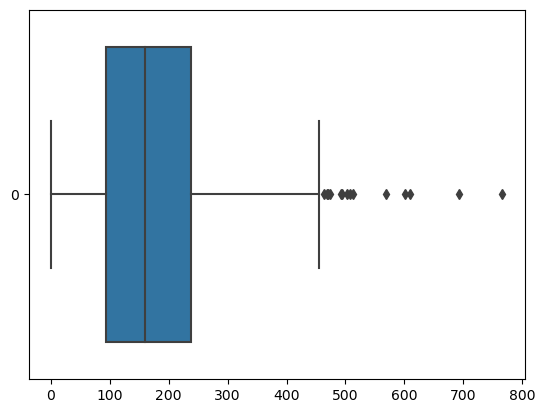

In [290]:
# preliminary exploration of outliers

sns.boxplot(merged_df['total_rainfall'], orient='h') 
# yes, there are some outliers above the upper bound. 

In [293]:
# calculate total_rainfall IQR
q1_total_rainfall = 93.85
q3_total_rainfall = 238.075

IQR = q3_total_rainfall - q1_total_rainfall
print(IQR)

144.225


In [310]:
# find the upper bound value 
right_quartile = q3_total_rainfall + (1.5*IQR)
print(f' Upper bound: {right_quartile}')

 Upper bound: 454.41249999999997


In [308]:
# find out the outlier months of total_rainfall
merged_df.loc[merged_df['total_rainfall'] > 460]

# looks like most of the outliers happened during the months of Dec and Jan

,year,month,date,total_rainfall,rainy_days,max_rainfall
11,1982,12,1982-12-01,494.1,21,109.0
25,1984,02,1984-02-01,470.4,19,154.4
60,1987,01,1987-01-01,568.6,16,127.4
94,1989,11,1989-11-01,508.4,20,148.6
119,1991,12,1991-12-01,492.3,19,79.4
130,1992,11,1992-11-01,474.3,18,120.6
131,1992,12,1992-12-01,502.7,23,105.7
203,1998,12,1998-12-01,463.4,22,84.4
239,2001,12,2001-12-01,609.0,20,211.1
264,2004,01,2004-01-01,600.9,13,177.8


<AxesSubplot: >

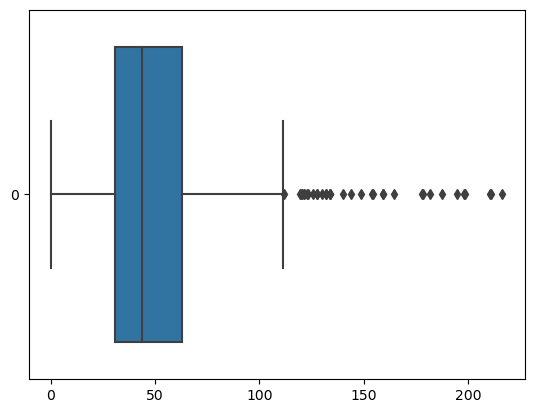

In [286]:
# find out if max_rainfall has outliers
sns.boxplot(merged_df['max_rainfall'], orient='h') 

In [309]:
# looks like max_rainfall has some outliers too - lets get the upper bound of max_rainfall to get the months
# calculate max_rainfall IQR
q1_max_rainfall = 30.675
q3_max_rainfall = 63.05

IQR_max_rainfall = q3_max_rainfall - q1_max_rainfall
print(IQR_max_rainfall)

32.375


In [311]:
# find the upper bound value 
right_quartile_max_rainfall = q3_max_rainfall + (1.5*IQR_max_rainfall)
print(f' Upper bound: {right_quartile_max_rainfall}')

 Upper bound: 111.6125


In [314]:
# find out the outlier months of max_rainfall
merged_df.loc[merged_df['max_rainfall'] > 112]

# looks a little random here, we can find out more through other analysis

,year,month,date,total_rainfall,rainy_days,max_rainfall
19,1983,08,1983-08-01,262.2,10,181.8
23,1983,12,1983-12-01,370.6,16,164.4
25,1984,02,1984-02-01,470.4,19,154.4
26,1984,03,1984-03-01,361.3,19,119.4
29,1984,06,1984-06-01,255.0,14,121.1
59,1986,12,1986-12-01,367.2,16,131.7
60,1987,01,1987-01-01,568.6,16,127.4
80,1988,09,1988-09-01,440.4,14,187.3
94,1989,11,1989-11-01,508.4,20,148.6
100,1990,05,1990-05-01,180.1,11,153.7


<AxesSubplot: >

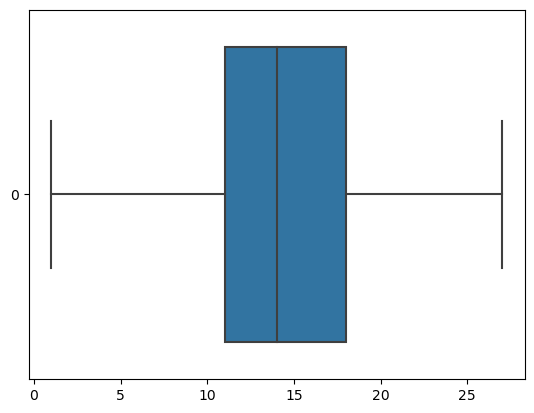

In [317]:
# find out if rainy_days has outliers
sns.boxplot(merged_df['rainy_days'], orient='h') 

# looks like there is no outliers for this set of values

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


In [ ]:
# More ideas on the plots that can be generated
'''
1. Are there any correlation between the values? (total nrainfall per month, and max rainfall in a day, number of rainy days)
2. If yes, what are their correlation?
3. What are the years of dry season? use lines to indicate dry seasons
5. does it coincide with epidermic curve? if yes, why? if not, why not?
'''

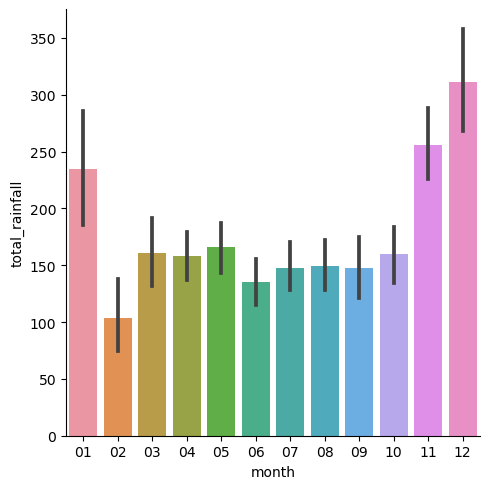

In [346]:
# is there seasonability in total rainfall? find out rainfall by month
sns.catplot(data=merged_df, x='month', y='total_rainfall', kind='bar')

*Total rainfall by months over the years*: Looks like the later months are those with higher total rainfall. 

We can study the seasonality by grouping them into different seasons

In [ ]:
# put the season's data here

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_2432/2213643248.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


<AxesSubplot: >

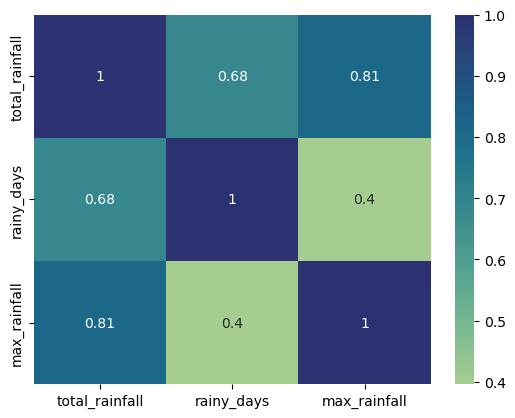

In [355]:
# find out corr between highest daily rainfall and max rainfall
corr = merged_df.corr()
sns.heatmap(corr, annot=True, cmap="crest")

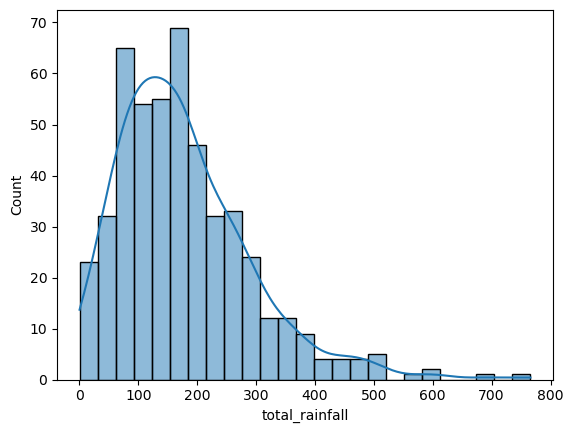

In [332]:
# histrogram of the total rainfall in mm
# mean is 177.16 mm
sns.histplot(merged_df['total_rainfall'], bins = 25, kde = True);

In [335]:
merged_df['total_rainfall'].mean()

177.1637295081967

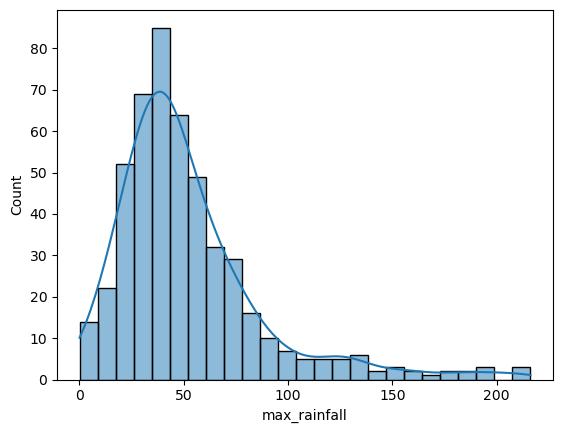

In [334]:
sns.histplot(merged_df['max_rainfall'], bins = 25, kde = True);
# mean amount of max rainfall is around 52mm per month

In [337]:
merged_df['max_rainfall'].mean()

52.33217213114754

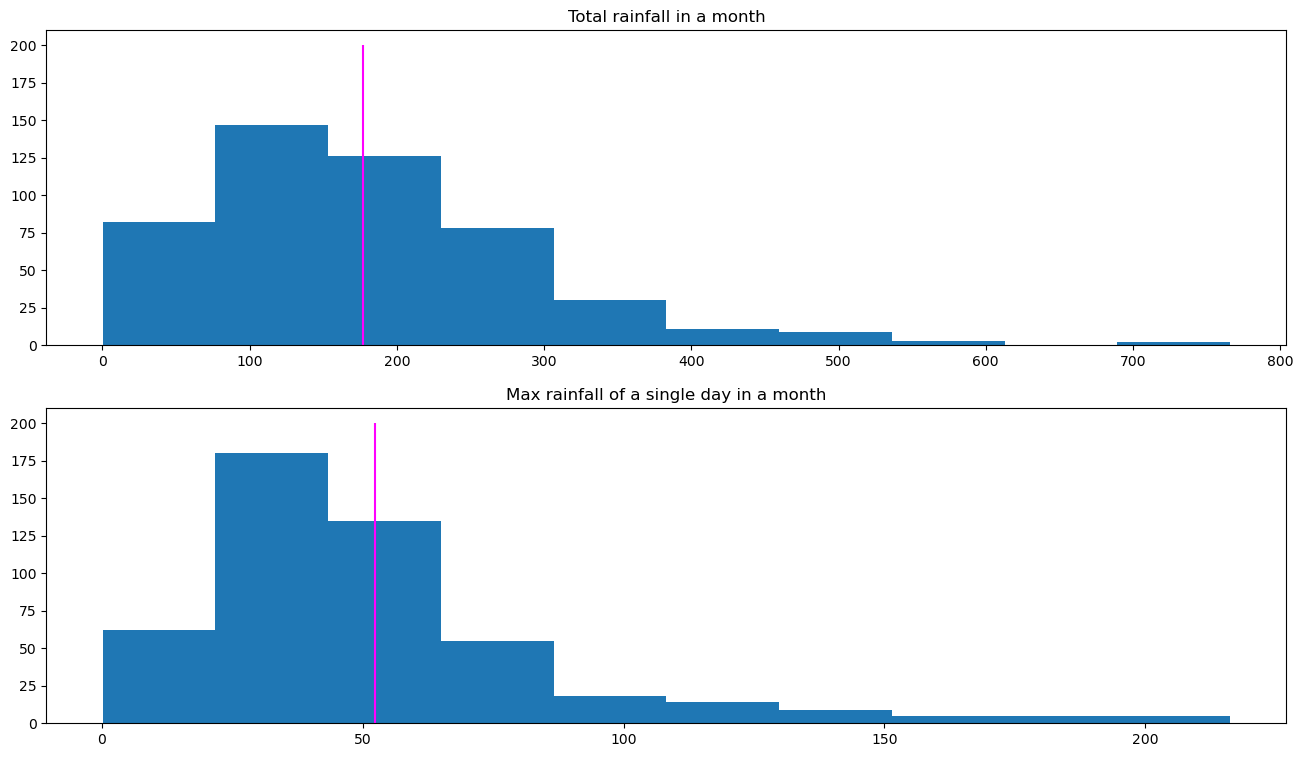

In [349]:
# Plot of rainfall in a month, and max rainfall in a single day
plt.figure(figsize = (16,9))

ax1 = plt.subplot(2,1,1)
ax1.set_title('Total rainfall in a month')
ax1.hist(merged_df['total_rainfall'])
ax1.vlines(x = np.mean(merged_df['total_rainfall']), ymin=0, ymax=200, colors='magenta')

ax2 = plt.subplot(2,1,2)
ax2.set_title('Max rainfall of a single day in a month')
ax2.hist(merged_df['max_rainfall'])
ax2.vlines(x = np.mean(merged_df['max_rainfall']), ymin=0, ymax=200, colors='magenta')

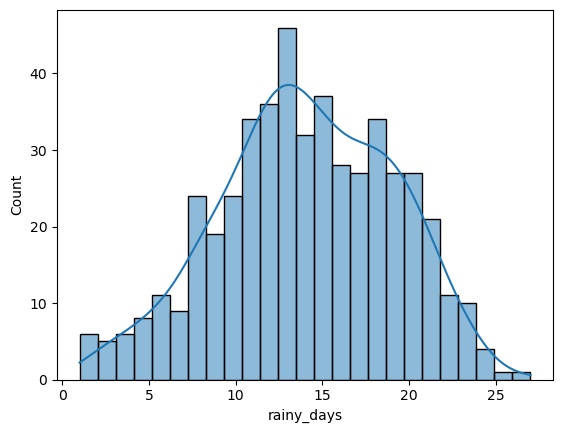

In [333]:
sns.histplot(merged_df['rainy_days'], bins = 25, kde = True);

In [336]:
merged_df['rainy_days'].mean()
# the mean number of rainy days is around 14 days in a month

14.061475409836065

In [377]:
merged_df.tail()

,year,month,date,total_rainfall,rainy_days,max_rainfall
483,2022,04,2022-04-01,239.6,18,58.8
484,2022,05,2022-05-01,102.0,12,44.6
485,2022,06,2022-06-01,211.8,17,59.4
486,2022,07,2022-07-01,145.2,16,27.8
487,2022,08,2022-08-01,141.4,15,32.4


In [384]:
merged_df[merged_df['year']=='2014']

,year,month,date,total_rainfall,rainy_days,max_rainfall
384,2014,01,2014-01-01,75.4,5,31.2
385,2014,02,2014-02-01,0.2,1,0.2
386,2014,03,2014-03-01,66.0,6,52.6
387,2014,04,2014-04-01,110.0,17,28.8
388,2014,05,2014-05-01,125.8,18,22.2
389,2014,06,2014-06-01,71.4,11,18.8
390,2014,07,2014-07-01,148.6,15,29.0
391,2014,08,2014-08-01,241.0,20,44.2
392,2014,09,2014-09-01,83.6,9,34.6
393,2014,10,2014-10-01,120.0,10,32.8


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!